In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
from collections import Counter

In [2]:
orig_df = pd.read_csv("/Users/isaiahpinto/PycharmProjects/pythonProject/Projects/Supermarket Online Sales Data/train.csv")
orig_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
orig_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df = orig_df.drop(columns=['Row ID','Customer ID','Postal Code'])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #Changing format from str to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y') #Changing format from str to datetime
df['Year']=df['Order Date'].dt.strftime('%Y') #Extracting year from Order Date
df['Month']=df['Order Date'].dt.strftime('%m') #Extracting month from Order Date
df['Order Date DOM'] = df['Order Date'].dt.day_name()
df['Lead Time'] = df['Ship Date'] - df['Order Date'] #We will be utilizing this for analysis of average time from order date to ship date
df.head(3) #to quickly inspect dataset

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Order Date DOM,Lead Time
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,Wednesday,3 days
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11,Wednesday,3 days
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,06,Monday,4 days


In [7]:
df.info() # to check dtype of dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Order ID        9800 non-null   object         
 1   Order Date      9800 non-null   datetime64[ns] 
 2   Ship Date       9800 non-null   datetime64[ns] 
 3   Ship Mode       9800 non-null   object         
 4   Customer Name   9800 non-null   object         
 5   Segment         9800 non-null   object         
 6   Country         9800 non-null   object         
 7   City            9800 non-null   object         
 8   State           9800 non-null   object         
 9   Region          9800 non-null   object         
 10  Product ID      9800 non-null   object         
 11  Category        9800 non-null   object         
 12  Sub-Category    9800 non-null   object         
 13  Product Name    9800 non-null   object         
 14  Sales           9800 non-null   float64 

<Axes: title={'center': 'Top 10 Product Sales'}, xlabel='Sales', ylabel='Product Name'>

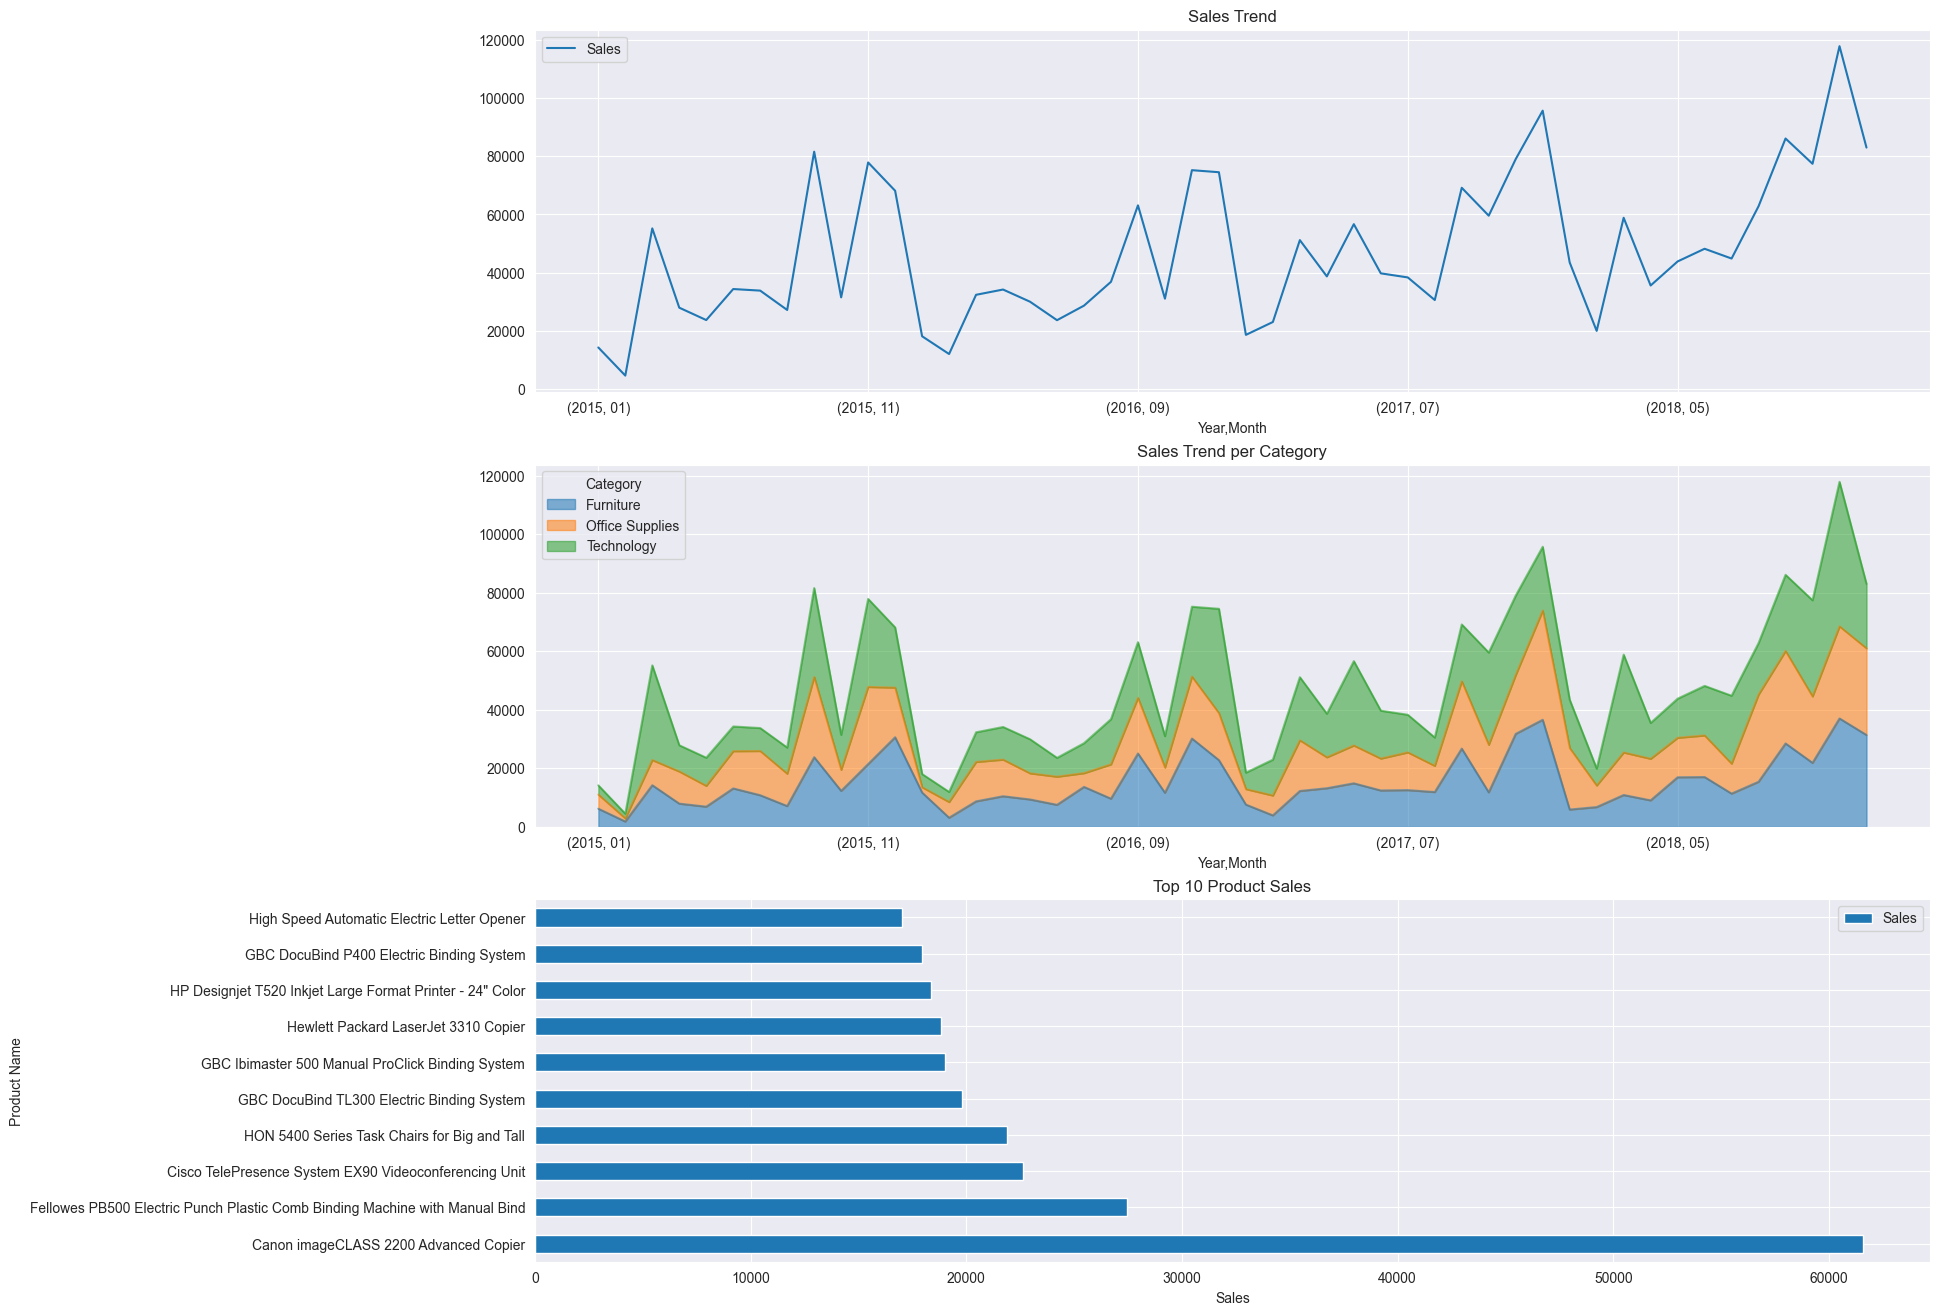

In [8]:
fig,axs = plt.subplots(3,1,figsize=(18,16))
sales_trend_df = df[['Year','Month','Sales']]
sales_trend_df = sales_trend_df.groupby(['Year','Month'],as_index=True).sum()
sales_trend_df.plot(kind='line',ax=axs[0],y='Sales', title='Sales Trend')

category_sales_trend_df = df[['Year','Month','Category','Sales']]
category_sales_trend_df = category_sales_trend_df.groupby(['Year','Month','Category'],as_index=False).sum()
category_sales_trend_df.pivot(index='Category', columns=['Year','Month'],values='Sales').transpose().plot(kind='area', ax=axs[1],alpha = 0.55, title='Sales Trend per Category')

product_name_df = df[['Category','Product Name','Sales']]
product_name_df = product_name_df.groupby(['Category','Product Name'],as_index=False).sum().sort_values(by='Sales', ascending=False)
product_name_df.head(10).plot(kind='barh', ax=axs[2], x='Product Name', y= 'Sales', xlabel = 'Sales', title='Top 10 Product Sales')

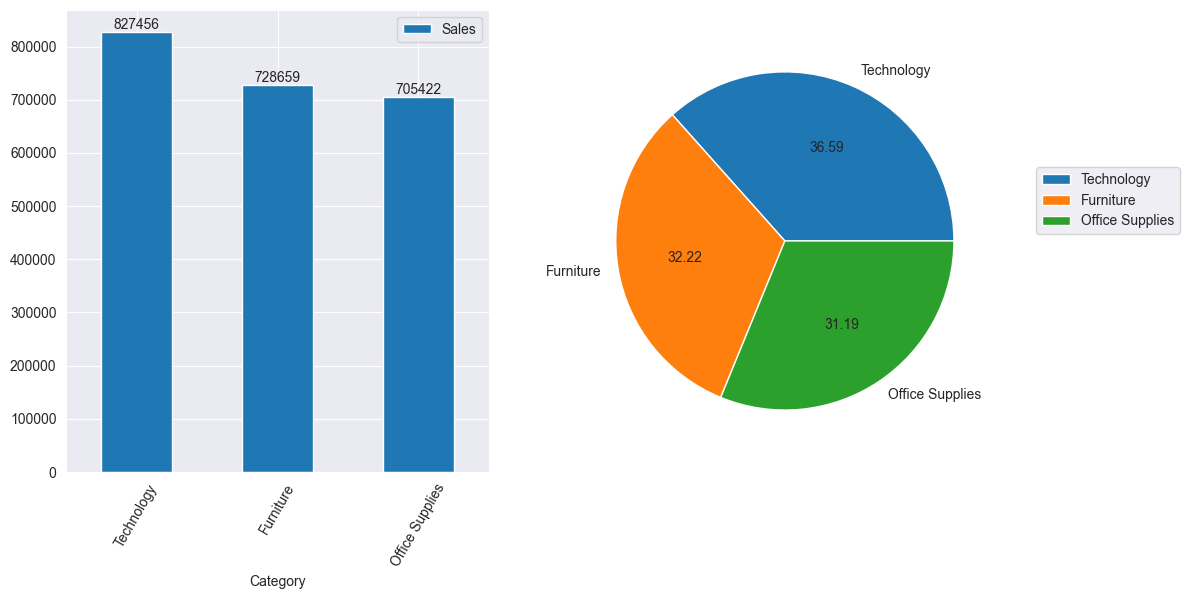

In [9]:
#We will see % share of category
category_df = df[['Category','Sales']]
fig,axs =plt.subplots(1,2,figsize=(12,6))
category_df = category_df.groupby(['Category'],as_index=True).sum().sort_values('Sales',ascending=False)
category_df.plot(kind='bar',ax=axs[0], rot=60)
category_df.plot(kind='pie',ax=axs[1],x='Category',y='Sales',autopct="%.2f").legend(bbox_to_anchor=(1.45, 0.5), loc='lower right')
axs[1].set_ylabel("")
for container in axs[0].containers:
    axs[0].bar_label(container)

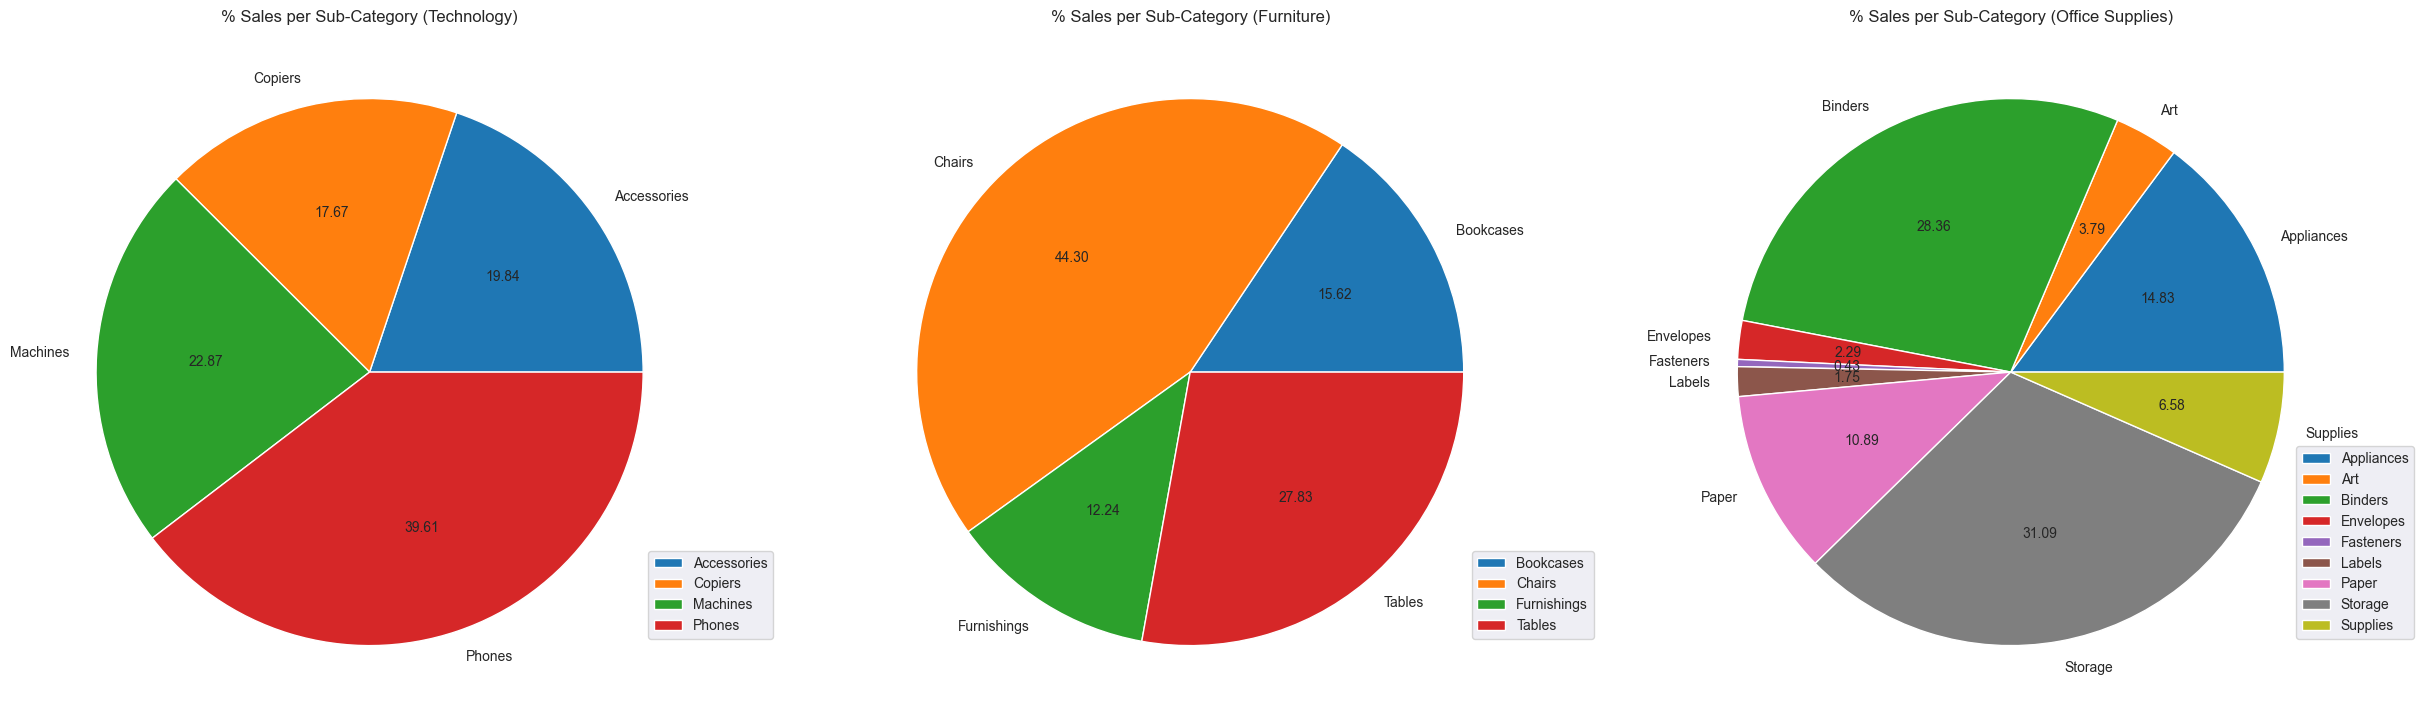

In [10]:
#Next we will look into the breakdown of each category
subcatlist = ['Technology', 'Furniture','Office Supplies']
subcategory_df = df[['Category','Sub-Category','Sales']]
fig, axs = plt.subplots(1,3,figsize=(30,10))
for i in range(len(subcatlist)):
    sales_per_subcategory = subcategory_df.loc[subcategory_df['Category'] == subcatlist[i]]
    sales_per_subcategory = sales_per_subcategory.groupby(['Sub-Category'],as_index=True).sum()
    sales_per_subcategory.plot(kind='pie', ax = axs[i], x='Sub-Category',y='Sales',autopct="%.2f")Total Land Area (acres).legend(bbox_to_anchor=(1.1, 0.1), loc='lower right')
    axs[i].set_title('% Sales per Sub-Category ({})'.format(subcatlist[i]))
    axs[i].set_ylabel("")
 

/var/folders/41/xpt3z91d4373w0zlgn1h6j8w0000gn/T/ipykernel_87871/33912105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_pair_df['Group'] = order_pair_df.groupby('Order ID')['Product Name'].transform(lambda x:','.join(x))


<Axes: title={'center': 'Top 10 Most Common Product Pairings'}, ylabel='Pairings'>

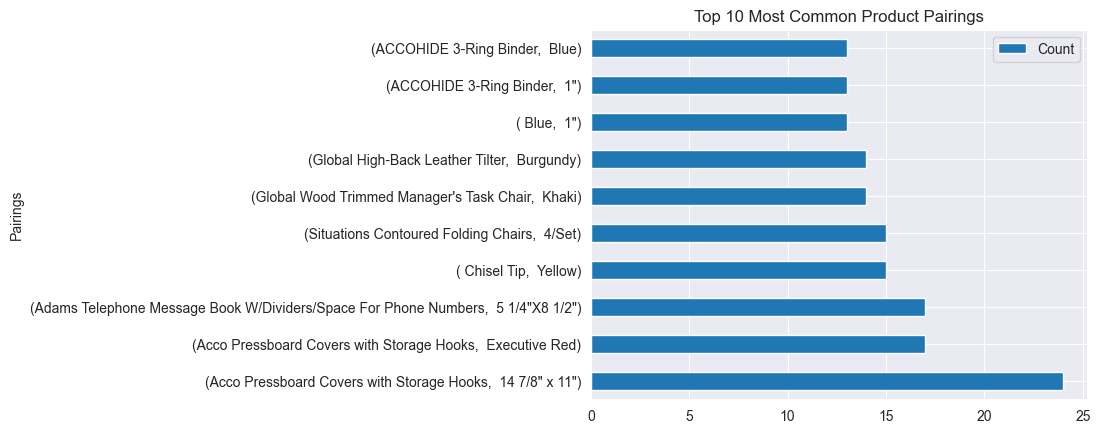

In [11]:
order_pair_df = df[['Order ID','Product Name']]
order_pair_df['Group'] = order_pair_df.groupby('Order ID')['Product Name'].transform(lambda x:','.join(x))
order_pair_df =order_pair_df[['Order ID','Group']].drop_duplicates()
count = Counter()
for row in order_pair_df['Group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

order_pairing = pd.DataFrame.from_dict(count, orient='index')
order_pairing.reset_index(inplace=True)
order_pairing.rename(columns={0:'Count','index':'Pairings'},inplace=True)
order_pairing.sort_values('Count',ascending=False,inplace=True)
order_pairing.head(10).plot(kind='barh',title='Top 10 Most Common Product Pairings',x='Pairings')

Text(0, 0.5, '')

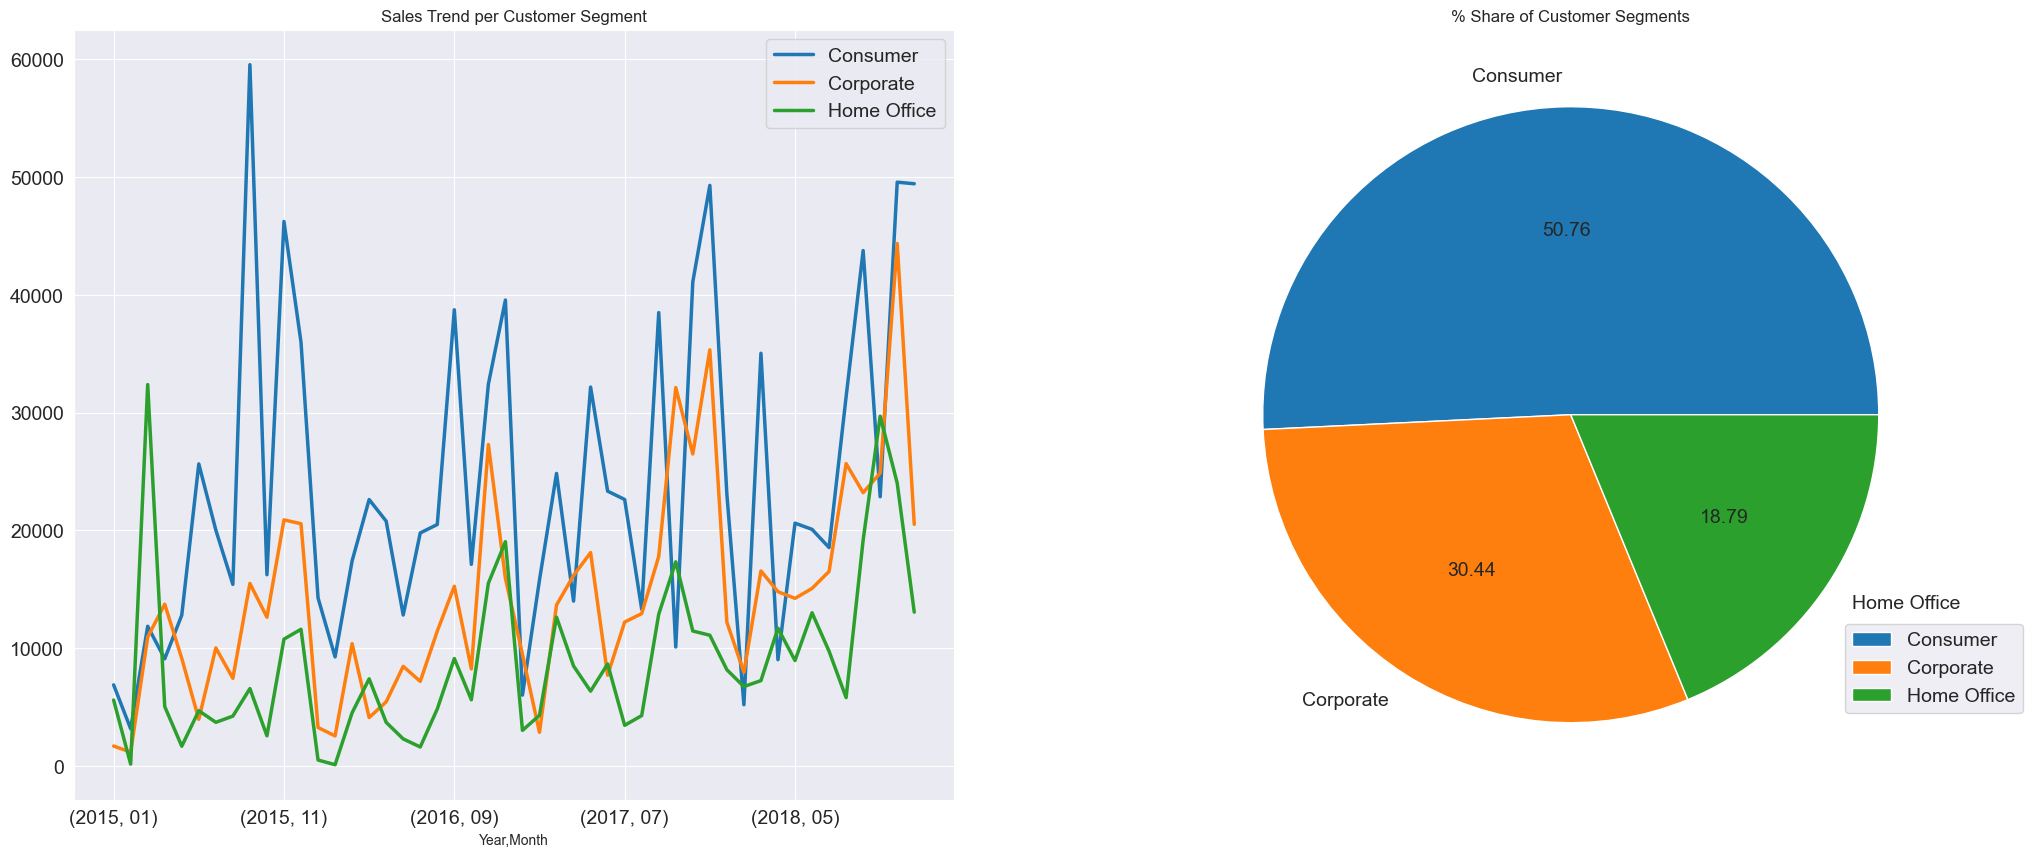

In [12]:
#Next we would like to analyze the customer behavior
#First we would like to see the different segments sales trend and % share of sales
fig, axs = plt.subplots(1,2, figsize=(25,10))
segments_df = df[['Year','Month','Segment','Sales']]
segments_df = segments_df.groupby(['Year','Month','Segment'],as_index=False).sum()
segments_df.pivot(index = ['Year','Month'], columns='Segment',values='Sales').plot(kind='line', ax=axs[0], lw=2.5,fontsize = 14,title='Sales Trend per Customer Segment').legend(fontsize = 14)

segments_df = segments_df.groupby(['Segment'],as_index=True).sum()
segments_df.plot(kind='pie',ax=axs[1], x='Segment',y='Sales',autopct="%.2f", title='% Share of Customer Segments',fontsize = 14).legend(bbox_to_anchor=(1.1, 0.1), loc='lower right',fontsize = 14)
axs[1].set_ylabel("")
#Initial hypothesis from this is that each customer segment are vastly different from one another in terms of buying power

In [13]:
# Perform ANOVA
segments_anova_df = df[['Segment','Sales']]
model = ols('Sales ~ Segment',data=segments_anova_df).fit()
aov_table = sm.stats.anova_lm(model,typ=2)
aov_table
#PR(>F) Through this, we can conclude that there is no statistically significant difference between the means of segments given that PR(>F) is greater than 0.05

,sum_sq,df,F,PR(>F)
Segment,4.613767e+05,2.0,0.587403,0.555788
Residual,3.847533e+09,9797.0,NaN,NaN


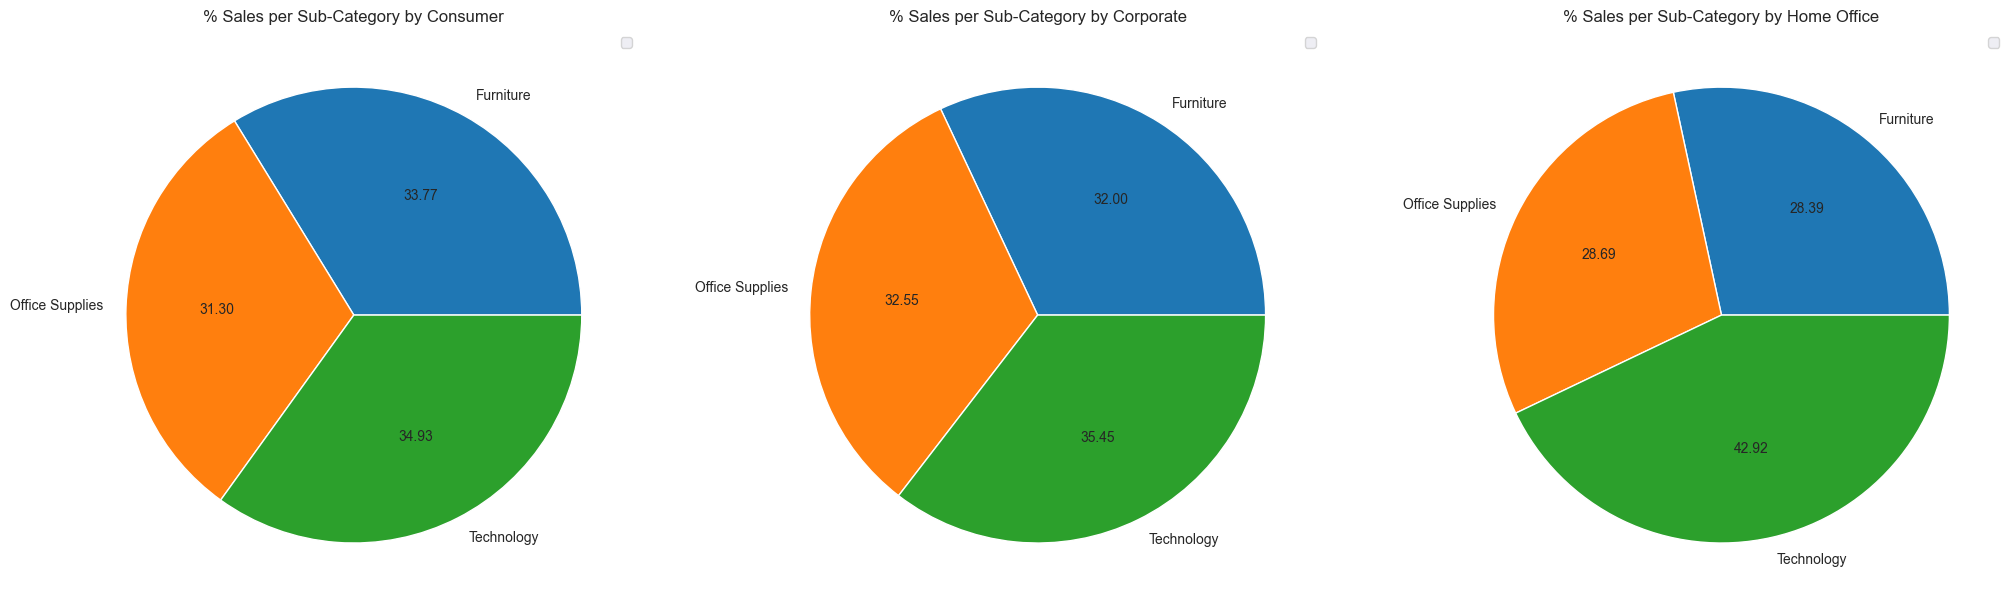

In [14]:
#We want to see the most common products each customer type buys
segmentlist = ['Consumer','Corporate','Home Office']
fig, axs = plt.subplots(1,3,figsize=(25,10))
segments_sales = df[['Segment','Category','Sales']]
for i in range(len(segmentlist)):
    segments_sales_df = segments_sales.loc[segments_sales['Segment']==segmentlist[i]]
    segments_sales_df = segments_sales_df.groupby(['Category'],as_index=True).sum()
    segments_sales_df.plot(kind='pie',x='Segment', y='Sales',autopct="%.2f",ax=axs[i])
    axs[i].set_title('% Sales per Sub-Category by {}'.format(segmentlist[i]))
    axs[i].set_ylabel("")
    axs[i].legend("")

Text(0.5, 1.0, 'Top 5 States with the Most Sales')

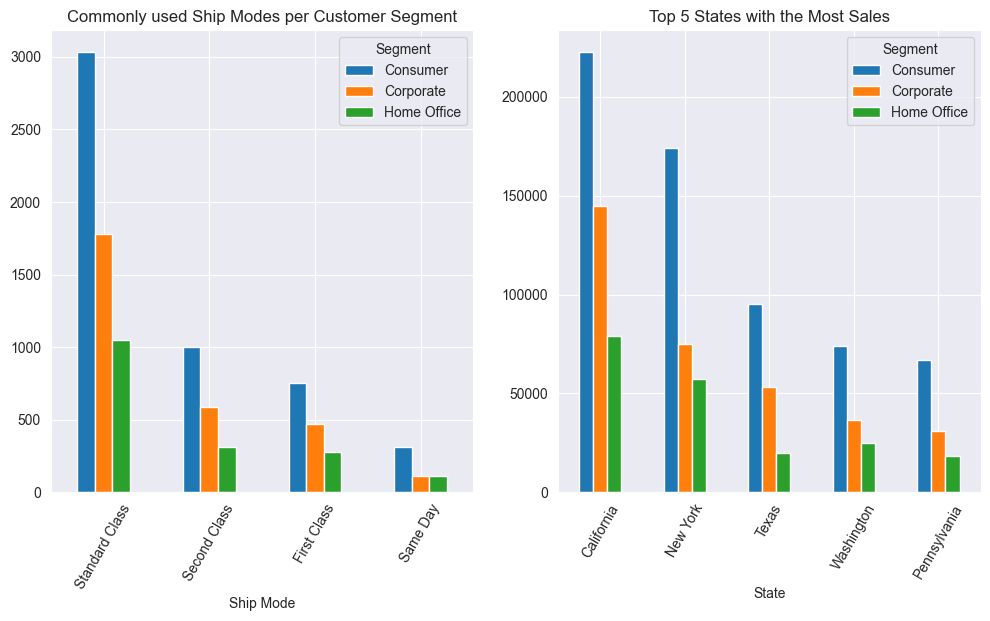

In [15]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
segment_shipping = df[['Segment','Ship Mode', 'Sales']]
segment_shipping = segment_shipping.groupby(['Segment','Ship Mode'],as_index=False).count().rename(columns={'Sales':'Count'})
segment_shipping_pivot = segment_shipping.pivot(index = 'Ship Mode', columns = 'Segment', values = 'Count')
segment_shipping_pivot['Total'] = segment_shipping_pivot['Consumer']+segment_shipping_pivot['Corporate']+segment_shipping_pivot['Home Office']
segment_shipping_pivot= segment_shipping_pivot.sort_values('Total',ascending=False)
segment_shipping_pivot.drop(columns=['Total'],inplace= True)
segment_shipping_pivot.plot(kind='bar', ax=axs[0], rot = 60)
axs[0].set_title("Commonly used Ship Modes per Customer Segment")

segment_state = df[['Segment','State','Sales']]
segment_state = segment_state.groupby(['Segment','State'],as_index=False).sum()
segment_state_pivot = segment_state.pivot(index = 'State', columns = 'Segment', values = 'Sales')
segment_state_pivot.replace(np.nan,0,inplace=True)
segment_state_pivot['Total'] = segment_state_pivot['Consumer']+segment_state_pivot['Corporate']+segment_state_pivot['Home Office']
segment_state_pivot=segment_state_pivot.sort_values('Total',ascending = False)
segment_state_pivot.drop(columns=['Total'],inplace=True)
segment_state_pivot.head().plot(kind='bar',ax=axs[1], rot = 60)
axs[1].set_title("Top 5 States with the Most Sales")

/var/folders/41/xpt3z91d4373w0zlgn1h6j8w0000gn/T/ipykernel_87871/1630127561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leadtime['Lead Time'] = (df_leadtime['Lead Time'].dt.total_seconds()/86400)
/var/folders/41/xpt3z91d4373w0zlgn1h6j8w0000gn/T/ipykernel_87871/1630127561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shipping['Lead Time'] = (df_shipping['Lead Time'].dt.total_seconds()/86400)
/var/folders/41/xpt3z91d4373w0zlgn1h6j8w0000gn/T/ipykernel_87871/1630127561.py:19: SettingWithCop

Text(0.5, 1.0, 'Lead Time Box Plots per Category')

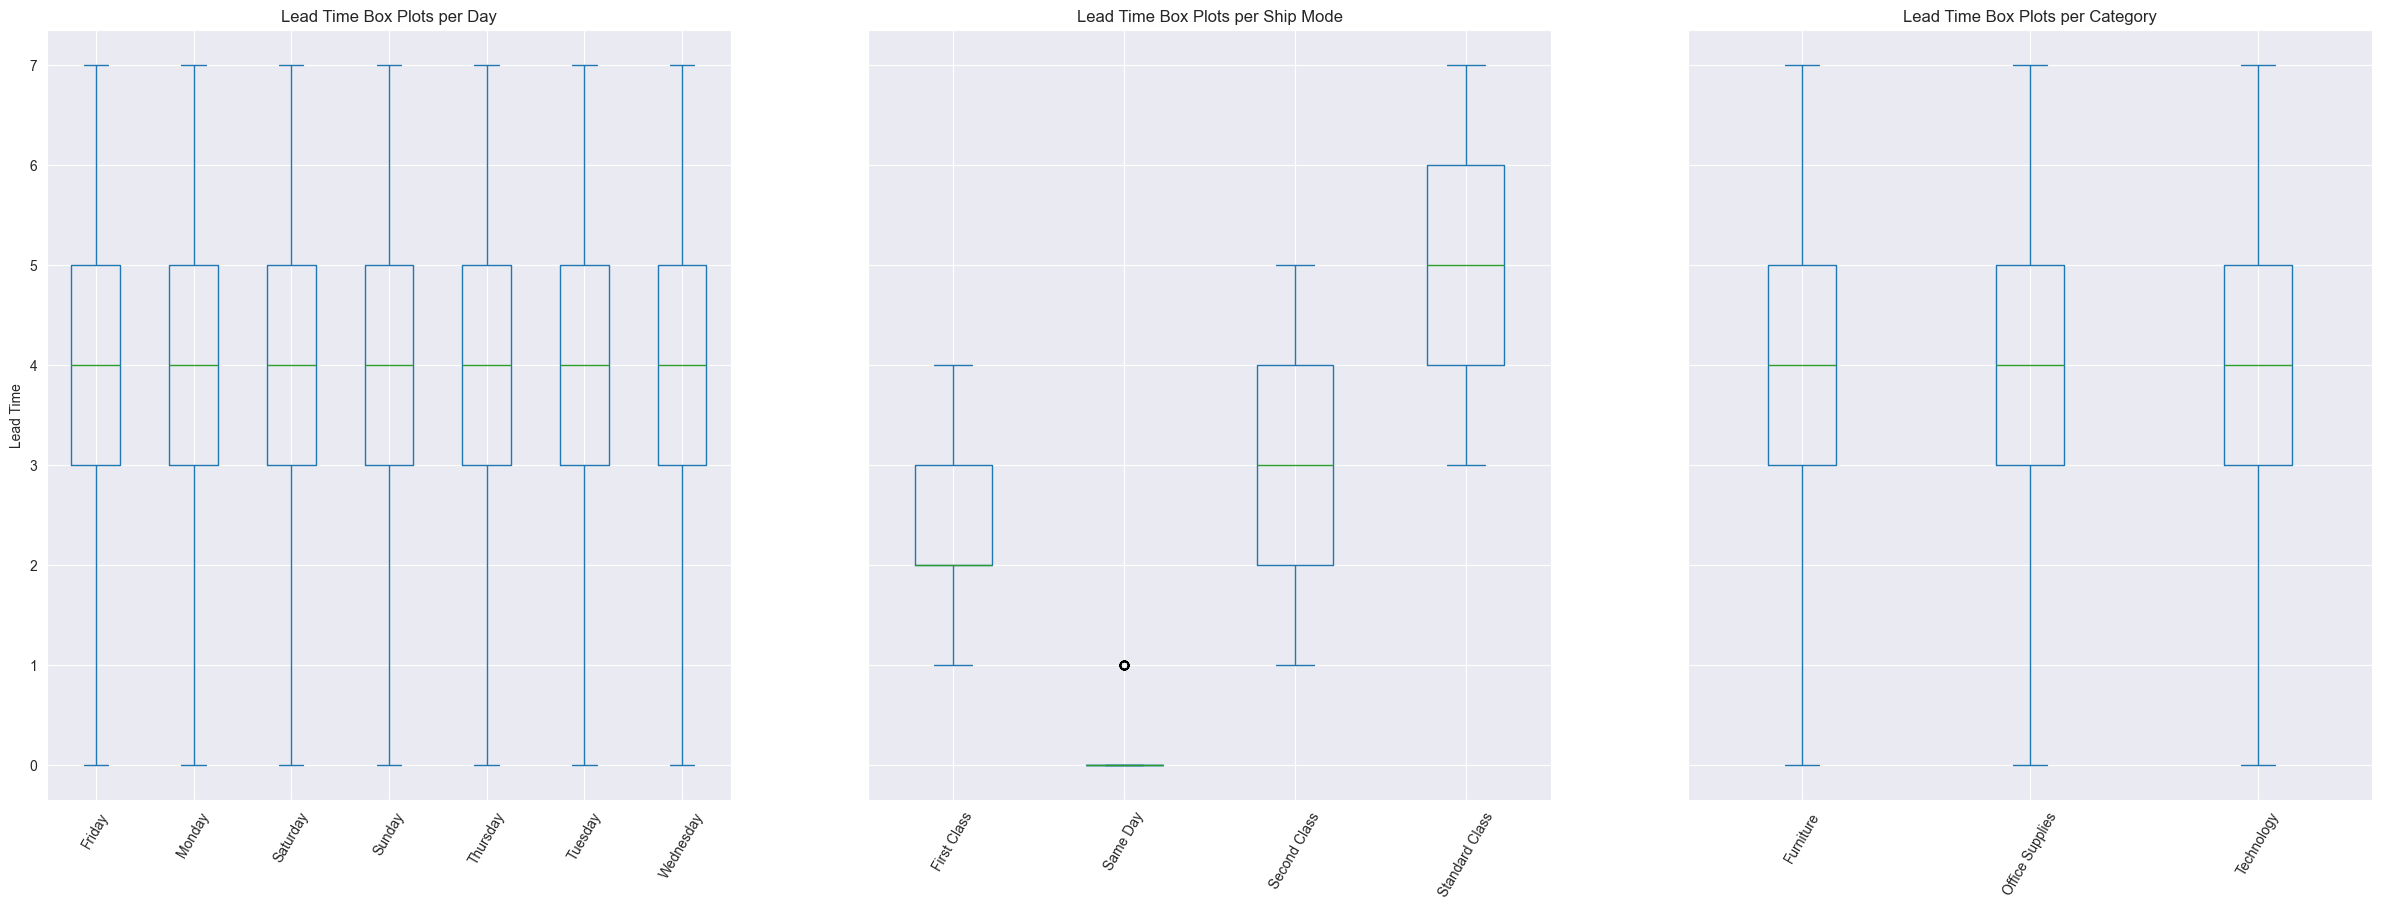

In [16]:
#next we would like to see if there are any difference between leadtimes per DOM
#cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig,axs = plt.subplots(1,3,figsize=(30,10),sharey=True)
df_leadtime = df[['Order Date DOM','Lead Time']]
#df_leadtime = df_leadtime.groupby(['Order Date DOM']).mean().reindex(cats) this changes the index to cats
df_leadtime['Lead Time'] = (df_leadtime['Lead Time'].dt.total_seconds()/86400)
df_leadtime.plot(kind='box',rot=60,ax=axs[0],ylabel = 'Lead Time', by='Order Date DOM')
axs[0].set_title('Lead Time Box Plots per Day')
#from this we could see that there are no significant differences of lead times depending on day

#next we would like to see the difference in lead times per shipmode
ships = ['Same Day','First Class', 'Second Class','Standard Class']
df_shipping = df[['Ship Mode','Lead Time']]
df_shipping['Lead Time'] = (df_shipping['Lead Time'].dt.total_seconds()/86400)
df_shipping.plot(kind='box',rot=60,ax=axs[1],ylabel = 'Lead Time', by='Ship Mode')
axs[1].set_title('Lead Time Box Plots per Ship Mode')

category_leadtime = df[['Category','Lead Time']]
category_leadtime['Lead Time'] = (category_leadtime['Lead Time'].dt.total_seconds()/86400)
category_leadtime.plot(kind='box',rot=60,ax=axs[2],ylabel = 'Lead Time', by='Category')
axs[2].set_title('Lead Time Box Plots per Category')

In [17]:
df_shipping_sameday = df.loc[df['Ship Mode']=='Same Day']
df_shipping_sameday['Lead Time'] = (df_shipping_sameday['Lead Time'].dt.total_seconds()/86400)
df_shipping_sameday.loc[df_shipping_sameday['Lead Time'] == 1]
#We inspected all same day deliveries that we're delivered a day late.
#We want to see if there are any major differences from these that were late compared to other same day deliveries that were able to do it.

/var/folders/41/xpt3z91d4373w0zlgn1h6j8w0000gn/T/ipykernel_87871/4209053927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shipping_sameday['Lead Time'] = (df_shipping_sameday['Lead Time'].dt.total_seconds()/86400)


,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Order Date DOM,Lead Time
1473,US-2016-105676,2016-12-01,2016-12-02,Same Day,Neoma Murray,Consumer,United States,Houston,Texas,Central,FUR-FU-10004270,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",6.688,2016,12,Thursday,1.0
2348,CA-2018-109701,2018-12-02,2018-12-03,Same Day,Alice McCarthy,Corporate,United States,Los Angeles,California,West,OFF-BI-10004187,Office Supplies,Binders,3-ring staple pack,9.024,2018,12,Sunday,1.0
2349,CA-2018-109701,2018-12-02,2018-12-03,Same Day,Alice McCarthy,Corporate,United States,Los Angeles,California,West,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,69.456,2018,12,Sunday,1.0
2350,CA-2018-109701,2018-12-02,2018-12-03,Same Day,Alice McCarthy,Corporate,United States,Los Angeles,California,West,OFF-PA-10003724,Office Supplies,Paper,"Wirebound Message Book, 4 per Page",10.860,2018,12,Sunday,1.0
2351,CA-2018-109701,2018-12-02,2018-12-03,Same Day,Alice McCarthy,Corporate,United States,Los Angeles,California,West,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,79.470,2018,12,Sunday,1.0
2352,CA-2018-109701,2018-12-02,2018-12-03,Same Day,Alice McCarthy,Corporate,United States,Los Angeles,California,West,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,10.080,2018,12,Sunday,1.0
3041,CA-2018-149559,2018-09-11,2018-09-12,Same Day,Karen Ferguson,Home Office,United States,Long Beach,California,West,OFF-PA-10003172,Office Supplies,Paper,Xerox 1996,12.960,2018,09,Tuesday,1.0
3042,CA-2018-149559,2018-09-11,2018-09-12,Same Day,Karen Ferguson,Home Office,United States,Long Beach,California,West,OFF-EN-10002312,Office Supplies,Envelopes,#10 Self-Seal White Envelopes,22.180,2018,09,Tuesday,1.0
3043,CA-2018-149559,2018-09-11,2018-09-12,Same Day,Karen Ferguson,Home Office,United States,Long Beach,California,West,FUR-CH-10002320,Furniture,Chairs,Hon Pagoda Stacking Chairs,2054.272,2018,09,Tuesday,1.0
3440,CA-2016-144099,2016-11-29,2016-11-30,Same Day,Phillina Ober,Home Office,United States,San Francisco,California,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",4.304,2016,11,Tuesday,1.0


<Axes: xlabel='Lead Time'>

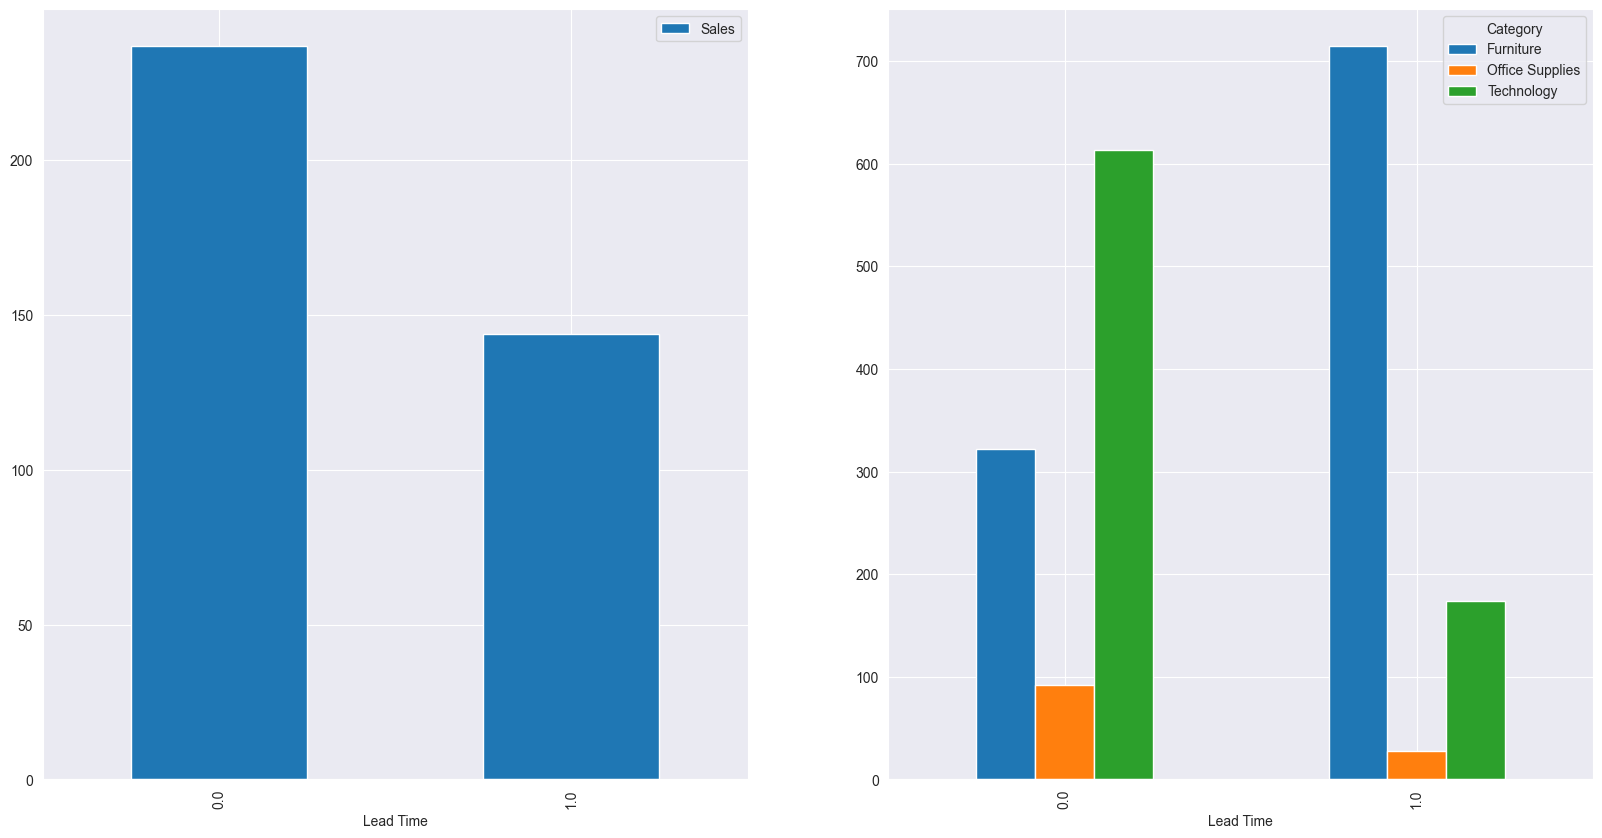

In [18]:
fig,axs =plt.subplots(1,2,figsize=(20,10))

df_shipping_sameday_plot = df_shipping_sameday[['Lead Time','Sales']]
df_shipping_sameday_plot.groupby(['Lead Time'],as_index=True).mean().plot(kind='bar',ax=axs[0])

df_category_sameday_plot = df_shipping_sameday[['Category','Lead Time','Sales']]
df_category_sameday_plot = df_category_sameday_plot.groupby(['Lead Time','Category'],as_index=False).mean()
df_category_sameday_plot_pivot = df_category_sameday_plot.pivot(index= 'Lead Time', columns='Category',values='Sales')
df_category_sameday_plot_pivot.plot(kind='bar', ax=axs[1])